In [1]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import joblib
import matplotlib.pyplot as plt

In [2]:
#importing warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing dataset
dataset = pd.read_csv("dataset_phishing.csv")

In [4]:
dataset.shape

(11430, 89)

In [5]:
dataset.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [6]:
dataset.isnull().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

In [7]:
dataset.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [8]:
#instance of LabelEncoder
le = LabelEncoder()
dataset.status = le.fit_transform(dataset.status)

In [9]:
dataset.drop(['url'], axis = 1, inplace = True)

In [10]:
dataset.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,126,50,1,4,1,0,1,2,0,3,...,1,0,0,14,4004,5828815,0,1,0,1
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


In [11]:
#extracting independent and dependent variables
X= dataset.iloc[:,:-1].values
y= dataset.iloc[:,-1].values  #last column of dataset
X.shape, y.shape, y

((11430, 87), (11430,), array([0, 1, 1, ..., 0, 0, 1]))

In [12]:
#splitting dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20, shuffle = True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9144, 87), (2286, 87), (9144,), (2286,))

In [13]:
X_train

array([[243.,  12.,   1., ...,   0.,   1.,   0.],
       [123.,  46.,   1., ...,   0.,   1.,   0.],
       [109.,   7.,   0., ...,   0.,   0.,   5.],
       ...,
       [ 76.,  50.,   1., ...,   0.,   1.,   0.],
       [ 77.,  17.,   0., ...,   0.,   0.,   1.],
       [ 21.,  12.,   0., ...,   0.,   0.,   3.]])

In [14]:
#instance of StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [15]:
X_train

array([[ 3.27284252, -0.83766273,  2.36387315, ..., -0.13927668,
         0.93188535, -1.24818807],
       [ 1.1124605 ,  2.29129154,  2.36387315, ..., -0.13927668,
         0.93188535, -1.24818807],
       [ 0.86041593, -1.29780307, -0.42303454, ..., -0.13927668,
        -1.07309338,  0.71605516],
       ...,
       [ 0.26631087,  2.65940381,  2.36387315, ..., -0.13927668,
         0.93188535, -1.24818807],
       [ 0.28431405, -0.3775224 , -0.42303454, ..., -0.13927668,
        -1.07309338, -0.85533942],
       [-0.72386422, -0.83766273, -0.42303454, ..., -0.13927668,
        -1.07309338, -0.06964213]])

In [16]:
#1st classification algorithm
classifier1=RandomForestClassifier(n_estimators=44,random_state=34)
classifier1.fit(X_train,y_train)
# joblib.dump(classifier1, 'Random_forest_model.joblib')
# classifier1 = joblib.load('Random_forest_model.joblib')
y_pred1 = classifier1.predict(X_test)

In [17]:
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred1))
print('\n')
print('Classification Report:')
print(classification_report(y_test,y_pred1))
acc1 = accuracy_score(y_test,y_pred1)
#print(acc1)
print('Accuracy:', "{:.2f}".format(acc1*100), '%')

Confusion Matrix:
[[1111   58]
 [  43 1074]]


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1169
           1       0.95      0.96      0.96      1117

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286

Accuracy: 95.58 %


In [18]:
#2nd classification algorithm
classifier2=LogisticRegression(fit_intercept=False, class_weight='balanced', max_iter=500, solver='sag')
classifier2.fit(X_train,y_train)
# joblib.dump(classifier2, 'Logistic_regression_model.joblib')
# classifier2 = joblib.load('Logistic_regression_model.joblib')
y_pred2 = classifier2.predict(X_test)

In [19]:
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred2))
print('\n')
print('Classification Report:')
print(classification_report(y_test,y_pred2))
acc2 = accuracy_score(y_test,y_pred2)
#print(acc2)
print('Accuracy:', "{:.2f}".format(acc2*100), '%')

Confusion Matrix:
[[1104   65]
 [  81 1036]]


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1169
           1       0.94      0.93      0.93      1117

    accuracy                           0.94      2286
   macro avg       0.94      0.94      0.94      2286
weighted avg       0.94      0.94      0.94      2286

Accuracy: 93.61 %


In [20]:
#3rd classification algorithm
classifier3=svm.SVC(kernel='poly', degree=3, C=1, gamma=0.1, probability=True)
classifier3.fit(X_train,y_train)
# joblib.dump(classifier3, 'SVM_model.joblib')
# classifier3 = joblib.load('SVM_model.joblib')
y_pred3 = classifier3.predict(X_test)

In [21]:
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred3))
print('\n')
print('Classification Report:')
print(classification_report(y_test,y_pred3))
acc3 = accuracy_score(y_test,y_pred3)
#print(acc3)
print('Accuracy:', "{:.2f}".format(acc3*100), '%')

Confusion Matrix:
[[1110   59]
 [  47 1070]]


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1169
           1       0.95      0.96      0.95      1117

    accuracy                           0.95      2286
   macro avg       0.95      0.95      0.95      2286
weighted avg       0.95      0.95      0.95      2286

Accuracy: 95.36 %


In [22]:
#Ensemble
estimator = []
estimator.append(('RFC', classifier1))
estimator.append(('LR', classifier2))
estimator.append(('SVC', classifier3))

In [23]:
#VotingClassifier
classifierE = VotingClassifier(estimators = estimator, weights=None)
classifierE.fit(X_train, y_train)
y_pred = classifierE.predict(X_test)
joblib.dump(classifierE, 'Voting_classifier_model2.joblib')
classifierE = joblib.load('Voting_classifier_model2.joblib')

In [24]:
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))
print('\n')
print('Classification Report:')
print(classification_report(y_test,y_pred))
acc = accuracy_score(y_test,y_pred)
#print(acc)
print('Accuracy:', "{:.2f}".format(acc*100), '%')

Confusion Matrix:
[[1123   46]
 [  46 1071]]


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1169
           1       0.96      0.96      0.96      1117

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286

Accuracy: 95.98 %


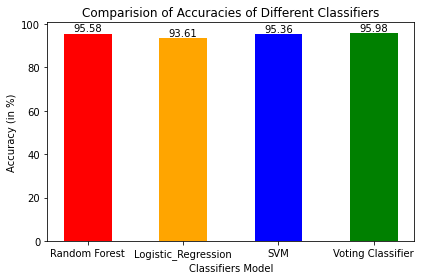

In [25]:
classifiers = ['Random Forest', 'Logistic_Regression','SVM','Voting Classifier'] 
accuracy = [acc1*100, acc2*100, acc3*100, acc*100]
y=[95.58, 93.61, 95.36, 95.98]
y_pos = np.arange(len(classifiers))
plt.xticks(y_pos, classifiers)
plt.xlabel('Classifiers Model')
plt.ylabel('Accuracy (in %)')
plt.title('Comparision of Accuracies of Different Classifiers')
plt.bar(y_pos, accuracy, width= 0.5, color = ['red','orange','blue','green'])

for i in range(len(accuracy)): 
    plt.text(i, y[i], y[i], ha="center", va="bottom")

plt.tight_layout()
plt.show()